In [1]:
%matplotlib inline


# M345SC Lab 8


In lecture, we saw that FFTs could be used to analyze the frequency content of time series. In this lab, you will learn how to use them to differentiate periodic functions.

We will work with a Gaussian function, $f(x) = exp(-\alpha x^2)$
with $-5 \le x \le 5$. We will choose $\alpha$ so that the Gaussian is sufficiently narrow for f and several of its derivatives to be near zero at the boundaries (why?). The function below will generate this Gaussian with $x$ and $\alpha$ provided as input.

In [56]:
import numpy as np
def gauss(x,alpha):
    return np.exp(-alpha*x**2)

### Part 1: Fourier coefficients

1) Complete the cell below so that it generates a grid, $x$, with $N=100$ points in the interval [-5, 5).
You should first generate $N+1$ points from -5 to 5 (inclusive), and then remove the $N+1$th point.

In [69]:
import numpy as np
N = 100
alpha = 4
Grid = np.linspace(-5, 5, N+1)
Grid = Grid[:-1]

2) Now generate the Guassian and plot $f(x)$. Is $\alpha$ sufficiently large?

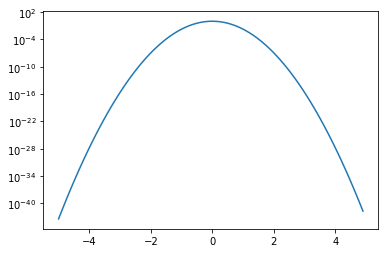

In [58]:
import matplotlib.pyplot as plt
f1 = gauss(Grid, alpha)
plt.semilogy(Grid, f1)

# Alpha is not big enough unfortunately

2) Now, compute the Gaussian's Fourier coefficients ($c_n$) and plot $|c_n|$ on a semilog plot. Compute a new Gaussian, $g$  with $\alpha=1$. 
Compute its Fourier coefficients and add them to your plot. Why are the the two curves different?

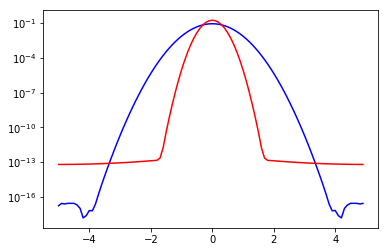

In [59]:
c1 = np.fft.fft(f1)
c1 = np.fft.fftshift(c1)/N

plt.semilogy(Grid, abs(c1), 'b')

alpha = 1
f2 = gauss(Grid, alpha)

c2 = np.fft.fft(f2)
c2 = np.fft.fftshift(c2)/N

plt.semilogy(Grid, abs(c2), 'r')

# They are different because a different alpha duh...

### Part 2: Differentiation

For time series, the *nth* Fourier coefficient corresponds to a frequency, $fr_n= n/T$ where T is the timespan of the signal. For a spatially varying function, the *nth* coefficient corresponds to a wavenumber, $k_n=2 \pi n/L$ where for our example above, $L=10$. The wavenumber plays a key role in Fourier differentiation. If the Fourier coefficients of $f(x)$ are $c_n$, then the coefficients of $df/dx$ are $i k_n c_n$.

The basic steps then are, i) construct $k_n$, ii) compute $c_n$, iii) compute the inverse Fourier transform of $i k_n c_n$. 

1) Construct $k_n$ for $f(x)$ from our example above. Now, *n* and *k* will have to be in "fft order", $n=0,1,...,N/2-1,-N/2,-N/2+1,...,-1$

In [187]:
N = 100
x = np.arange(-N/2, N/2)  # Note formula: 0, 1, 2, 3, ...., N/2-2, N/2-1, -N/2, -N/2+1, -N/2+2, ..., -1
n = np.fft.fftshift(x)    # Using fftshift to get in proper order
L = 10
k = 2*np.pi*n/L

2) Now, compute $df$, N times the inverse FFT of $ikc$:

In [191]:
alpha = 4
f3 = gauss(Grid, alpha)
c3 = np.fft.fft(f3)
c3 = np.fft.fftshift(c3)/N
df = N*np.fft.ifft(1j*k*c3)

The code below will plot $df$ and the exact derivative of the Gaussian. If $df$ has been constructed correctly, the two should be extremely close.

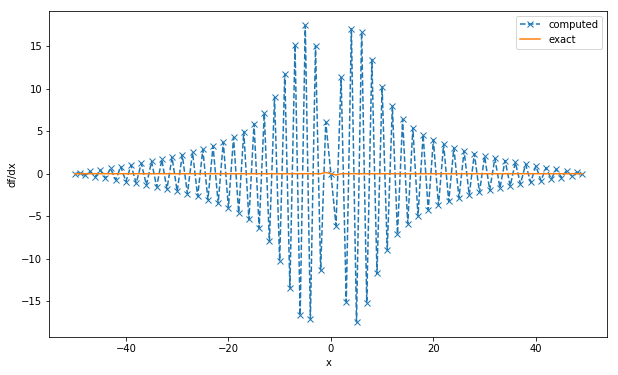

In [189]:
plt.figure(figsize=(10,6))
plt.plot(x,df,'x--')
plt.plot(x,-2*alpha*x*f)
plt.xlabel('x')
plt.ylabel('df/dx')
plt.legend(('computed','exact'))

3) Repeat the steps above with *N=25* and *N=50*. Compute the error, $\epsilon(x) = |df_{computed}-df_{exact}|$ for all three values of *N* and plot them on a figure.

In [7]:
#add code here

4) A critically important idea is "grid convergence" which is connected to the rate at which the error decreases as $\Delta x$ decreases (or as $N$ increases). For a well-posed method, for sufficiently small $\Delta x$, the solution should be *grid independent* -- further decreases in the grid spacing will not meaningfully reduce the error any further. This typically occurs when the error is close to ~$1e-15$. At (approximately) what value of $N$ does the differentiation of the Gaussian (with $\alpha=4$) become grid independent?